# Reading
Read the following readings:

Bruce, Bruce and Gedeck (2020), Chapter 1 Exploratory Data Analysis, Estimates of Location section, pp.7–13.

Leekley (2010), Chapter 3 Describing Data: Summary Statistics, Section 3.2.1 Measures of Central Tendency, pp.43–50. 

## Activity

For each of the followings sets of data, compute the mean, median and mode. Where there are significant differences, explain the reasons for these differences and comment on the value of the information you are obtaining from each.

Fun task: discuss your results with your classmates (use the discussion forum).

>Question 1

The annual incomes of people drinking in a pub (in thousands of pounds) is: 

45, 52, 38, 90, 45, 36, 70, 100, 85, 6

Elon Musk walks into the pub. He has an annual income of 140 billion dollars. How does this affect the mean, median and mode?

Elon Musk is an outlier. One way of dealing with outliers is to do statistics ignoring the tails at both ends.

>Question 2

The number of hours that 10 supposedly identical lightbulbs (with an advertised lifetime of 2,000 hours) last is as follows:

2090, 1900, 2010, 1890, 2010, 1968, 70, 2200, 2012, 1960

Comment on the data.

>Question 3

The height measurements of a population of 1,000 people, as given in the following table.

|Height in inches |Number|
|-|-|
|46-52|	13|
|52-58|	215|
|58-64|	1459|
|64-70|	3413|
|70-76|	3243|
|76-82|	1512|
|82-88|	135|
|88-94|	10|

## Q1

Let's start with calculating the mean, median and mode. 

In [3]:
import numpy as np
import scipy.stats as st

incomes = np.array([45, 52, 38, 90, 45, 36, 70, 100, 85, 6], dtype=int)

incomes.mean(), np.median(incomes), st.mode(incomes).mode

(56.7, 48.5, 45)

If we add Elon Musk's income to the dataset, this is what happens:

In [20]:
incomes_w_musk = np.append(incomes, [140000000])
# incomes_w_musk
round(incomes_w_musk.mean(), 2), np.median(incomes_w_musk), st.mode(incomes_w_musk).mode

(12727324.27, 52.0, 45)

So, most affected is the mean.

We could a. simply refer to the median, or b. add a trimmed mean.

In [21]:
st.trim_mean(incomes_w_musk, 0.1) #  slices off 'leftmost' and 'rightmost' 10% of scores

62.333333333333336

## Q2

So we have:

In [24]:
lightbulb_hrs = [2090, 1900, 2010, 1890, 2010, 1968, 70, 2200, 2012, 1960]

lb_hr_arr = np.array(lightbulb_hrs)
lb_hr_arr.sort()
lb_hr_arr

array([  70, 1890, 1900, 1960, 1968, 2010, 2010, 2012, 2090, 2200])

In [32]:
round(lb_hr_arr.mean(), 2), np.median(lb_hr_arr), st.mode(lb_hr_arr).mode

(1811.0, 1989.0, 2010)

In [40]:
mean_line = np.full_like(lb_hr_arr, fill_value=lb_hr_arr.mean()) # or np.fill and then use the len(lb_hr_arr) but this is neater
median_line = np.full_like(lb_hr_arr, fill_value=np.median(lb_hr_arr))

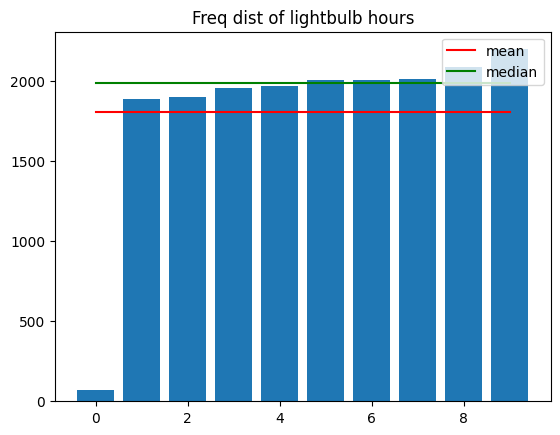

In [104]:
import matplotlib.pyplot as plt

plt.bar(range(len(lb_hr_arr)), lb_hr_arr)
plt.plot(mean_line, color='red', label='mean')
plt.plot(median_line, color='green', label='median')
plt.title("Freq dist of lightbulb hours")
plt.legend(loc='upper right')

Tip: to find plt.legend loc: `help(plt.legend) or plt.legend?`

> In the small sample provided, we can see that there is one outlier - one value of 70. Thus, the median or trimmed mean may give a better measure of location aka centrality. 

## Q3

Heights in metre of 1000 people:
|Height in inches |Number|
|-|-|
|46-52|	13|
|52-58|	215|
|58-64|	1459|
|64-70|	3413|
|70-76|	3243|
|76-82|	1512|
|82-88|	135|
|88-94|	10|

In [62]:
# some cleaning to turn the markdown table into lists
mess = """|Height in inches |Number|
|-|-|
|46-52|	13|
|52-58|	215|
|58-64|	1459|
|64-70|	3413|
|70-76|	3243|
|76-82|	1512|
|82-88|	135|
|88-94|	10|"""

lines_in_mess = mess.split("\n")

heights =  [line.split('|')[1] for line in lines_in_mess][2:]
numbers =  [line.split('|')[2].replace('\t','') for line in lines_in_mess][2:]
numbers = [int(number) for number in numbers]
heights, numbers

(['46-52', '52-58', '58-64', '64-70', '70-76', '76-82', '82-88', '88-94'],
 [13, 215, 1459, 3413, 3243, 1512, 135, 10])

Text(0.5, 1.0, 'Freq Dist of Heights')

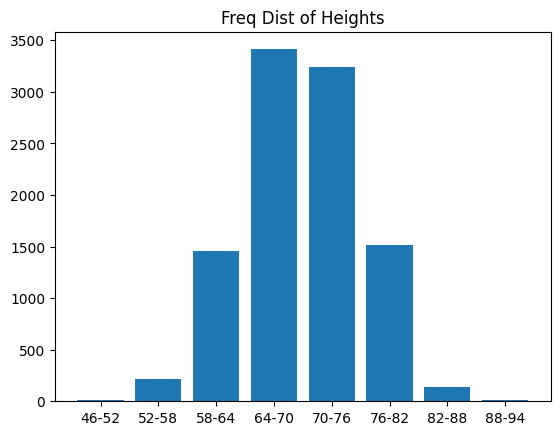

In [66]:
plt.bar(heights, numbers); plt.title('Freq Dist of Heights')

The mode is obvious from looking at the graph: the 64-70 bucket has highest number of observations. It is the *most common value.*
$$mode = 64-70$$

The mean is a bit harder.

In [68]:
# to find mean we need to find the middle of each bucket
middle_heights = [(int(h.split('-')[0]) + int(h.split('-')[1]))/2 for h in heights]
middle_heights

[49.0, 55.0, 61.0, 67.0, 73.0, 79.0, 85.0, 91.0]

In [73]:
np.sum(numbers)

10000

In [80]:
# remember: ndarrays can multipy element wise
sum = np.sum((np.array(middle_heights) * np.array(numbers)))
mean = sum / np.sum(numbers)
mean

69.8704

So the mean is:
$$mean = 69.87$$

The median is the middle of a sorted list. As there are 10000 `numbers`, the median is the `height` of number 5000. 

So we can add up the shortest people until we reach 5000th person, and then show their bin. 

In [81]:
sum_of_numbers = 0
for number, bin in zip(numbers,heights):
    sum_of_numbers += int(number)
    if sum_of_numbers >= 5000:        
        print(bin)
        break 

64-70


When a median falls in the middle of an even-length list, we take the average, so, 
$$median = 67$$